# Statistics in Machine Learning 4 - Probability Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, poisson, expon
from math import exp, factorial

## 🔹 Why We Model Data with Distributions


Let’s begin with a question:

> Imagine you’re analyzing people’s daily commute times.
Some take 5 minutes, some 20, some 60 — the numbers vary.
Why might it be useful to model this data with a “distribution”?

Think about it — what could a distribution tell you that a single average (like “the mean commute is 30 minutes”) cannot?

A distribution indeed tells us how many data points fall into each category or range.
In other words, it shows the pattern of frequencies — how the data are spread out.

Let’s build on that idea:
- If you only know the mean, you know the center.
- If you also know the distribution, you know how the data are shaped —
e.g. are most commutes short, or are there a few very long ones?

Here’s a simple way to say it:
> A probability distribution describes how likely each possible outcome is.

If we toss a fair die, what does the distribution look like?
(Think: how many outcomes, and what are their probabilities?)

But let’s picture the die again:
- A fair die has 6 faces, numbered 1 through 6.
- Each face is equally likely.

So — if all outcomes are equally likely, what’s the probability of any single face showing up?

Each face (1, 2, 3, 4, 5, or 6) has a probability of

$$\frac{1}{6} \approx 0.167$$
	​
and if you add them all up → $6 \times \frac{1}{6} = 1$


That’s a perfect example of a **uniform distribution**, because:
- Every outcome is **equally likely**,
- The probability is the same for all possible values.

Real-world data, like commute times, almost never spread out evenly.
Some values (like 20–40 minutes) happen more often, while others (like 90 minutes) are rare.

That’s where other types of distributions come in — they help describe how data cluster and taper off.

Here’s our roadmap from here:
1. **Uniform distribution** → all outcomes equally likely (you already got this).
2. **Normal distribution** → most values near the mean, fewer at the extremes.
3. **Binomial distribution** → counts of “success/failure” events (like flipping coins).

## 🔹 The Normal Distribution — Our Benchmark

Let’s start with an image in your mind:
- Picture a bell-shaped curve.
- Most data points cluster around the middle, and the frequency drops off symmetrically toward the sides.
- That shape is the Normal distribution (also called Gaussian).

| Concept                    | Meaning in Normal Distribution                    |
| -------------------------- | ------------------------------------------------- |
| **Mean (μ)**               | The center of the bell — most values cluster here |
| **Standard deviation (σ)** | Controls the **spread** or **width** of the bell  |
| **Skewness**               | = 0 → perfectly symmetrical                       |
| **Kurtosis**               | = 3 (mesokurtic) → tails neither heavy nor light  |

So, when data roughly form this bell shape, we can use powerful statistical tools — like z-scores, probabilities, and confidence intervals.

Human height is one of the classic examples of a Normal distribution.

Most people cluster around the average height, and as you move away — say, much shorter or much taller — the frequency drops sharply and symmetrically.

That’s why the bell shape fits so well.

If we plotted the heights of 10,000 adults, we’d see:

- The peak near the average (μ),
- The width determined by the standard deviation (σ),
- Fewer people as we move 2–3σ away (the tails).

Do you remember roughly what percentage of data fall within 1, 2, and 3 standard deviations from the mean in a Normal distribution?

It’s called the Empirical Rule (or 68–95–99.7 rule):

| Range      | % of data in Normal distribution |
| ---------- | -------------------------------- |
| **μ ± 1σ** | ≈ **68%**                        |
| **μ ± 2σ** | ≈ **95%**                        |
| **μ ± 3σ** | ≈ **99.7%**                      |

That’s what makes the Normal distribution such a powerful benchmark — it tells us, “How unusual is a value?” just from its distance from the mean.

Let’s look at how the Normal, Uniform, and Binomial distributions differ — not just in shape, but in what kind of randomness they describe.

🔹 1. Uniform Distribution

- Shape: Flat (every outcome equally likely)
- Example: Rolling a fair die, random number from 0–1
- Key idea: No clustering; everything is equally common

🔹 2. Normal Distribution

- Shape: Bell curve — highest at the mean, symmetric tails
- Example: Heights, IQ scores, measurement errors
- Key idea: Most values near average, few extremes

🔹 3. Binomial Distribution

- Shape: Discrete bars (counts of successes), roughly bell-shaped when large n
- Example: Number of heads in 10 coin flips
- Key idea: Probability of successes across fixed trials

| Situation               | Likely Model | Why                                    |
| ----------------------- | ------------ | -------------------------------------- |
| Random number generator | Uniform      | All outcomes equal                     |
| Heights of students     | Normal       | Natural variation clusters around mean |
| Coin toss results       | Binomial     | Only two outcomes each trial           |


If you were studying email spam detection, which of these distributions might you expect for

(a) the length of emails, and

(b) the number of spam words in an email?

(A) Length of emails → Normal distribution
- ✅ Correct.
- Email lengths cluster around an average — most are moderate length, while very short or very long emails are rarer.
- (In practice, it might not be perfectly normal, but the idea holds.)

(B) Number of spam words → Binomial distribution
- ✅ Also correct.
- Each word in an email can be seen as a trial (spam word or not),
- and we count the number of successes (spam words) across all words — exactly what Binomial models.

So far, you’ve:
- Understood what distributions are,
- Seen the differences among uniform, normal, and binomial,
- Tied them to real-world examples.

Next, we will visualize these distributions

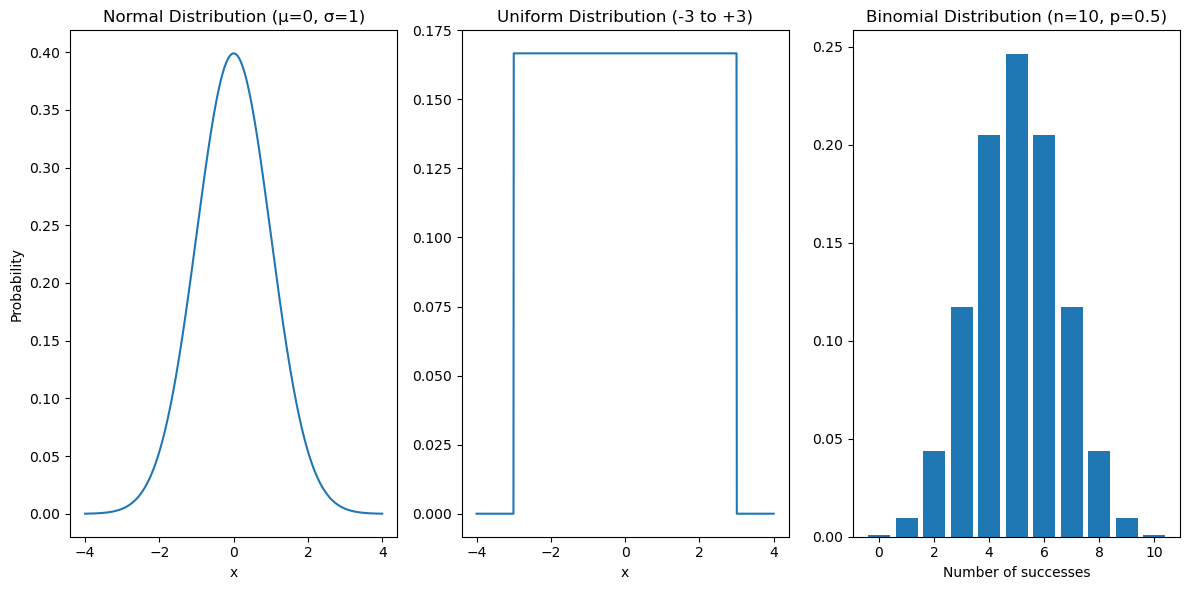

In [2]:
# Create data
x = np.linspace(-4, 4, 1000)

# 1. Normal Distribution
normal_y = norm.pdf(x, loc=0, scale=1)

# 2. Uniform Distribution
uniform_y = uniform.pdf(x, loc=-3, scale=6)  # from -3 to +3

# 3. Binomial Distribution
n, p = 10, 0.5
x_binom = np.arange(0, n+1)
binom_y = binom.pmf(x_binom, n, p)

# Plot
plt.figure(figsize=(12, 6))

# Normal
plt.subplot(1, 3, 1)
plt.plot(x, normal_y)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("x"); plt.ylabel("Probability")

# Uniform
plt.subplot(1, 3, 2)
plt.plot(x, uniform_y)
plt.title("Uniform Distribution (-3 to +3)")
plt.xlabel("x")

# Binomial
plt.subplot(1, 3, 3)
plt.bar(x_binom, binom_y)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of successes")

plt.tight_layout()
plt.show()


🧠 What to look for:

- Normal: Smooth bell curve centered at 0.
- Uniform: Flat line — all outcomes equally likely.
- Binomial: Discrete bars centered near 5 (for 10 flips, p=0.5).

## 🔹 The Central Limit Theorem (CLT)
💡 The big idea:
> When you combine (or average) many random effects, their sum tends to follow a Normal distribution — even if the original data weren’t Normal.

#### 🧠 Intuitive example

Imagine measuring daily commute time:

- It’s affected by many small, independent factors:traffic lights, weather, walking speed, bus delay, etc.
- Each factor adds a little random variation — some make the time longer, some shorter.

When you add up these small, independent effects →
their total (the commute time) tends to form a bell-shaped curve — the Normal distribution.

That’s why:
- Heights, IQ, exam scores, blood pressure, measurement errors, etc.
all end up approximately Normal in large populations.

🔍 In formula form:
If $X_1, X_2, X_3,....,X_n$	​ are independent random variables
with mean $\mu$ and variance $\sigma$
then the average:

$$\bar{X} = \frac{1}{n} \sum X_i$$

approaches a Normal distribution as $n$ increases:

$$\bar{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right) $$

⚙️ Why it matters for machine learning

Because of the CLT:
- Many algorithms assume Normality for estimation, errors, and confidence intervals.
- Even if raw data aren’t normal, averages or model errors often are.
- It underlies methods like z-scores, hypothesis tests, regression inference, etc.

We’ll start with a Uniform distribution (which is not normal), then take averages of many random samples — and watch the shape become a bell curve as sample size increases.

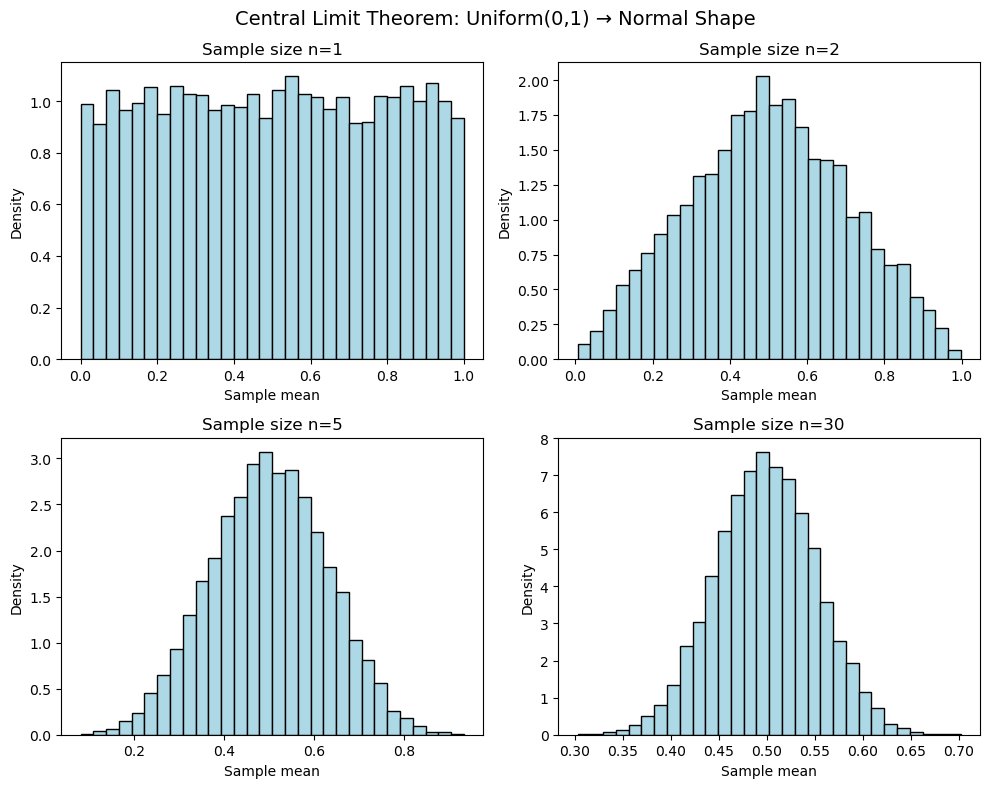

In [3]:
# 1. Settings
n_experiments = 10000   # how many samples we’ll simulate
sample_sizes = [1, 2, 5, 30]  # number of random draws per average

# 2. Create figure
plt.figure(figsize=(10, 8))

for i, n in enumerate(sample_sizes, 1):
    # Draw samples from a Uniform(0, 1) distribution
    samples = np.random.uniform(0, 1, size=(n_experiments, n))
    
    # Compute the mean of each sample
    sample_means = samples.mean(axis=1)
    
    # Plot histogram of means
    plt.subplot(2, 2, i)
    plt.hist(sample_means, bins=30, color='lightblue', edgecolor='black', density=True)
    plt.title(f'Sample size n={n}')
    plt.xlabel('Sample mean'); plt.ylabel('Density')

plt.suptitle('Central Limit Theorem: Uniform(0,1) → Normal Shape', fontsize=14)
plt.tight_layout()
plt.show()


🧠 What you’ll see:

- For n = 1 → looks uniform (flat).
- For n = 2 → starts to bump in the middle.
- For n = 5 → clearly curved.
- For n = 30 → looks like a bell curve (Normal distribution).

🔹 Z-Scores and Probability Under the Normal Curve
1. What’s a Z-score?

A z-score tells us how far a value is from the mean, measured in standard deviations.

$$z = \frac{x - \mu}{\sigma} $$

So:
- z=0 → exactly at the mean
- z=+1 → one SD above the mean
- z=−2 → two SDs below the mean

This standardization converts any Normal distribution into the **standard Normal** —
mean = 0, SD = 1.

2. What does a z-score represent?

It represents position on the bell curve.
For example:
- z=1 → about 84th percentile (top 16% higher)
- z=−1 → about 16th percentile
- z=2 → about 97.5th percentile

That means we can look up the probability that a value lies below or above any point.

3. Quick example

If test scores are Normal(μ=70, σ=10):

What’s the probability a student scores above 80?

$$z = \frac{80-70}{10} = 1$$

From the z-table, area below z=1 is ≈ 0.8413,
so area above = 1 − 0.8413 = 0.1587 (≈16%).

So, about 16% of students score above 80.

In [4]:
# Parameters
mean = 70
std_dev = 10
score_X = 80

# 1. Calculate the Z-score
z_score = (score_X - mean) / std_dev


# 2. Calculate Cumulative Distribution Function
# norm.cdf(z) gives the area to the left, which is P(X < 80)
probability_below_80 = norm.cdf(z_score)

# 2. Use the Survival Function (SF)
# norm.sf(z) gives the area to the right, which is P(X > 80)
probability_above_80 = norm.sf(z_score)

print(f"Z-score for 80: {z_score:.2f}")
print(f"Probability (Area to the left) using norm.cdf(): {probability_below_80:.4f}")
print(f"Probability (Area to the right) using norm.sf(): {probability_above_80:.4f}")

Z-score for 80: 1.00
Probability (Area to the left) using norm.cdf(): 0.8413
Probability (Area to the right) using norm.sf(): 0.1587


4. Why it’s important in ML
- Z-scores help in feature scaling (normalizing data).
- They’re used to detect outliers (e.g., z > 3).
- They connect model errors and probabilities in regression and hypothesis testing.

🧮 Example:

Suppose exam scores are normally distributed with
mean μ=75 and standard deviation σ=8.

We want to find the probability a student scores below 90.

Step 1. Compute z-score

$$z = \frac{x - \mu}{\sigma} = \frac{90 - 75}{8} = \frac{15}{8} = 1.875$$

Step 2. Find probability

From the z-table (or `scipy.stats.norm.cdf(1.875)`),

$$P(Z<1.875)≈0.9699$$

Step 3. Interpretation

About 96.99% of students score below 90, and the remaining 1−0.9699=0.0301 or 3.01% score above 90.

In [5]:
# Parameters
mean = 75
std_dev = 8
score_X = 90

# 1. Calculate the Z-score
z_score = (score_X - mean) / std_dev


# 2. Calculate Cumulative Distribution Function
# norm.cdf(z) gives the area to the left, which is P(X < 80)
probability_below_80 = norm.cdf(z_score)

# 2. Use the Survival Function (SF)
# norm.sf(z) gives the area to the right, which is P(X > 80)
probability_above_80 = norm.sf(z_score)

print(f"Z-score for {score_X}: {z_score:.2f}")
print(f"Probability student score below {score_X} (Area to the left) using norm.cdf(): {probability_below_80:.4f} = {probability_below_80*100:.2f}%")
print(f"Probability student score above {score_X} (Area to the right) using norm.sf(): {probability_above_80:.4f} = {probability_above_80*100:.2f}%")

Z-score for 90: 1.88
Probability student score below 90 (Area to the left) using norm.cdf(): 0.9696 = 96.96%
Probability student score above 90 (Area to the right) using norm.sf(): 0.0304 = 3.04%


Let’s restate the key takeaway:

> The z-score tells us how many SDs away a value is from the mean, and by converting that to a percentile, we know how rare or common that value is in the distribution.

In [6]:
# Parameters
mean = 75
std_dev = 8
score_X = 65

# 1. Calculate the Z-score
z_score = (score_X - mean) / std_dev


# 2. Calculate Cumulative Distribution Function
# norm.cdf(z) gives the area to the left, which is P(X < 80)
probability_below_80 = norm.cdf(z_score)

# 2. Use the Survival Function (SF)
# norm.sf(z) gives the area to the right, which is P(X > 80)
probability_above_80 = norm.sf(z_score)

print(f"Z-score for {score_X}: {z_score:.2f}")
print(f"Probability student score below {score_X} (Area to the left) using norm.cdf(): {probability_below_80:.4f} = {probability_below_80*100:.2f}%")
print(f"Probability student score above {score_X} (Area to the right) using norm.sf(): {probability_above_80:.4f} = {probability_above_80*100:.2f}%")

Z-score for 65: -1.25
Probability student score below 65 (Area to the left) using norm.cdf(): 0.1056 = 10.56%
Probability student score above 65 (Area to the right) using norm.sf(): 0.8944 = 89.44%


> A z-score of –1.25 places the student at about the 10.56th percentile, which means they performed better than only about 10% of students — or, as you said, worse than roughly 89% of others.

| z-score | Percentile | Interpretation    |
| ------- | ---------- | ----------------- |
| +2      | 97.5th     | Top 2.5%          |
| +1      | 84th       | Above average     |
| 0       | 50th       | Exactly average   |
| –1      | 16th       | Below average     |
| –2      | 2.5th      | Far below average |


🔹 Z-Scores for Outlier Detection
1. The core idea

> Outliers are values that are too far from the mean — their z-scores are very large in magnitude.

Because z-scores measure how many standard deviations away a value is, we can flag observations that are unusually far.

2. Common rule of thumb

| Range of z | Interpretation | 
| ---------- | -------------- | 
| ( z  < 2) | Normal (typical variation)             |
| ( z  ≥ 2) | Unusual                                |
| ( z  ≥ 3) | **Outlier** (rare: only ~0.3% of data) |

So, if z=3, it’s 3 SDs above the mean — an extreme value.

3. Example

Say exam scores have
mean μ=75, σ=8.
A student scores x=105:

$$𝑧 = 3.75$$

That’s a z-score of +3.75, meaning the score is 3.75 SDs above the mean — well beyond the “usual” range.

Such a value is an outlier, possibly due to:
- Exceptional performance, or
- A recording or measurement error.

4. In practice (ML/data preprocessing)

We often:

- Compute z-scores for all features.
- Flag or remove points with ∣z∣>3.
- Or, use robust scaling to reduce their influence.

You now understand:
- What a z-score is and how to interpret it,
- How to find percentiles and probabilities,
- And how to use it for detecting outliers.

That completes our Normal distribution chapter — from shape → probability → application.

Let’s zoom out for a second and look at the big picture of distributions.
Here’s how the next topics naturally connect:

1. Uniform – all outcomes equally likely.
2. Binomial – counts of success/failure.
3. Normal – continuous, centered around the mean (you’ve mastered this).
4. Other common distributions:
    - Poisson – counts of rare events (e.g. number of website errors per hour).
    - Exponential – time between events (e.g. time until next bus arrives).

## 🔹 The Binomial Distribution
1. What it describes
> The Binomial distribution models the number of successes in a fixed number of independent trials,
when each trial has the same probability of success p.

Think of it as answering:
> “If I repeat an experiment n times, how many times do I get success?”

2. Real-world examples

| Scenario             | Success                   | n          | p    |
| -------------------- | ------------------------- | ---------- | ---- |
| Coin toss            | Heads                     | 10 tosses  | 0.5  |
| Email classification | Correctly tagged as spam  | 100 emails | 0.9  |
| Manufacturing        | Product passes inspection | 20 tests   | 0.95 |

3. Formula

The probability of getting exactly $k$ successes in $n$ trials is:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ counts how many ways $k$ successes can occur.

It answers:

> “What’s the probability of getting exactly $k$ successes in $n$ independent trials?”

4. Mean and Variance

$$\mu = np, \sigma^2 = np(1-p)$$

This gives us the expected number and the spread.

If you flip a fair coin 10 times, what’s the most likely number of heads you’ll get?

You multiplied the probability of success (0.5) by the number of trials (10) — which gives
$$\mu = np = 10 \times 0.5 = 5$$

So, the most likely (expected) number of heads is 5.

That’s the center of the binomial distribution: it peaks around 5 heads out of 10 tosses.

Here’s what it looks like conceptually:
- 0 or 10 heads → very rare (tails or heads every time).
- 4, 5, or 6 heads → most common outcomes.
- It’s symmetric when  p=0.5.

What happens to the shape of the binomial distribution if p changes to 0.8 (more likely to get heads)?

When $p=0.5$, the Binomial distribution is symmetric (centered in the middle).
But when $p$ moves away from 0.5 — say, $p=0.8$ — it becomes skewed to the left.

Here’s why:

Most trials are successes (heads), so high counts (like 8 or 9) become common.

Low counts (like 0–3) become rare.
→ The tail stretches toward the left, giving a left-skewed shape.

And if p=0.2, the opposite happens (skewed right).

If $n=10$ and $p=0.8$, what’s the expected number of successes (mean)?

$$\mu = np = 10 \times 0.8 = 8$$

So on average, you’d expect 8 successes (or “heads”) every 10 trials.

> When $n$ is large, the Binomial distribution starts to resemble the Normal distribution — this is why the Normal is such a good approximation for many real-world counts.

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

It answers:

> “What’s the probability of getting exactly $k$ successes in $n$ independent trials?”

1️⃣ The three parts explained
(a) $p^k$
- Each “success” has probability $p$.
- If we get $k$ successes, we multiply $p$ by itself $k$ times → $p^k$
- That’s the chance of those $k$ successes.

(b) $(1 - p)^{n - k}$
- Each “failure” has probability $(1−p)$.
If there are $n−k$ failures, multiply $(1−p)$ that many times.

So together, $p^k(1 - p)^{n-k}$ is the probability of one specific sequence of outcomes
(e.g., HHTHT for coin tosses).

2️⃣ The tricky part — $\binom{n}{k}$

That’s the number of ways we can arrange those $k$ successes among $n$ trials.

Formula:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

🧮 Example 1 (we’ll do this together)

A coin is flipped 4 times.
What is the probability of getting exactly 3 heads?

Step 1. Write down what we know:
- $n=4$
- $k=3$
- $p=0.5$

Formula:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Step 2. Plug in:

$$P(X = 3) = \binom{4}{3} 0.5^3 (1-0.5)^{4-3}$$

Step 3. Calculate:

$$\binom{4}{3} = \frac{4!}{3!(4-3)!} = 4$$

$$P = 4 \times (0.5)^4 = 0.25$$

✅ So, the probability of getting exactly 3 heads in 4 tosses is 0.25 (25%).

In [7]:
from scipy.special import comb
n = 4
k = 3
comb(n, k, exact=True)

4

In [8]:
# P(X=3) for k = 3, n=4, p=0.5
# binom.pmf (k, n, p)
probability = binom.pmf(3, 4, 0.5) 
# probability will be 0.25
print(f"P(X=3) for n=4, p=0.5: {probability:.4f}")

P(X=3) for n=4, p=0.5: 0.2500


If you flip a coin 5 times, what’s the probability of getting exactly 2 heads?
n = 5, k = 2, p = 0.5

In [9]:
# P(X=3) for k = 2, n=5, p=0.5
# binom.pmf (k, n, p)
k = 2
n = 5
p = 0.5
probability = binom.pmf(k, n, p) 
# probability will be 0.25
print(f"P(X={k}) for n={n}, p={p}: P = {probability:.4f}")

P(X=2) for n=5, p=0.5: P = 0.3125


✅ So yes — 0.3125, or 31.25% chance of getting exactly 2 heads out of 5 flips.

You now understand the mechanics of the Binomial formula — each term means something:
- Choose (n k) → how many ways
- $p^k$ → success probability
- $(1−p)^{n−k}$ → failure probability

When $n=100$ and $p=0.5$:

- The mean $μ=100×0.5=50$
- Most outcomes cluster around 50 (maybe 48, 49, 50, 51, 52 heads)
- Outcomes far from 50 (like 10 or 90 heads) are extremely rare

So, the Binomial distribution for large $n$ becomes a smooth bell curve centered at the mean — that’s why we often approximate it with the Normal distribution.

🎲 Example: Rolling a die 6 times

Question:
What’s the probability of getting exactly 2 sixes?
- $n = 6$
- $k = 2$
- $p = \frac{1}{6}$

In [10]:
# binom.pmf (k, n, p)
k = 2
n = 6
p = 1/6
probability = binom.pmf(k, n, p) 
print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")

P(X=2) for n=6, p=0.1667: P = 0.2009


✅ Final answer: $P(X=2)≈0.2009$

So, there’s about a 20% chance of rolling exactly two sixes in six rolls.

🎯 Scenario: Flipping 2 coins once

Let’s list all possible outcomes:
→ { HH, HT, TH, TT }

Each outcome is equally likely, and there are 4 total.

Now let’s answer a few simple questions together:

1. What’s the probability of getting 2 heads (HH)?
2. What’s the probability of getting 1 head (HT or TH)?
3. What’s the probability of getting 0 heads (TT)?

---

| Outcome | # of heads |
| ------- | ---------- |
| HH      | 2          |
| HT      | 1          |
| TH      | 1          |
| TT      | 0          |

---

| Outcome type | Examples | Probability |
| ------------ | -------- | ----------- |
| 2 heads      | HH       | **0.25**    |
| 1 head       | HT, TH   | **0.50**    |
| 0 heads      | TT       | **0.25**    |

Those probabilities add up to 1, so it checks out.


Now, let’s connect this to the Binomial formula you already know — to see how it gives the same result.
$n = 2, p = 0.5, k = 1$

In [11]:
# binom.pmf (k, n, p)
k = 1
n = 2
p = 0.5
probability = binom.pmf(k, n, p) 
print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")

P(X=1) for n=2, p=0.5000: P = 0.5000


flipping 3 coins is the next natural step.

| Outcome | # of Heads |
| ------- | ---------- |
| HHH     | 3          |
| HHT     | 2          |
| HTH     | 2          |
| THH     | 2          |
| HTT     | 1          |
| THT     | 1          |
| TTH     | 1          |
| TTT     | 0          |


Now we can count:

- 3 heads → 1 outcome
- 2 heads → 3 outcomes
- 1 head → 3 outcomes
- 0 heads → 1 outcome

Each outcome has probability $1/8=0.125$.

Step 2. Calculate probabilities by counting

| # Heads | Ways | Probability   |
| ------- | ---- | ------------- |
| 0       | 1    | (1/8 = 0.125) |
| 1       | 3    | (3/8 = 0.375) |
| 2       | 3    | (3/8 = 0.375) |
| 3       | 1    | (1/8 = 0.125) |


In [12]:
# binom.pmf (k, n, p)
n = 3
p = 0.5
k_list = [0,1,2,3]

for k in k_list:
    probability = binom.pmf(k, n, p) 
    print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")

P(X=0) for n=3, p=0.5000: P = 0.1250
P(X=1) for n=3, p=0.5000: P = 0.3750
P(X=2) for n=3, p=0.5000: P = 0.3750
P(X=3) for n=3, p=0.5000: P = 0.1250


We want the probability of getting at least 3 rounds (out of 5) where you got exactly one head.

$n = 5, p = 0.5$

$k \geq 3$

In [13]:
# binom.pmf (k, n, p)
n = 5
p = 0.5
k_list = [3, 4, 5]
cumulative_probability = 0

for k in k_list:
    probability = binom.pmf(k, n, p) 
    print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")
    cumulative_probability += probability

print(f"Cumulative Probability P(X>=3) for n={n}, p={p:.4f}: P = {cumulative_probability:.4f}")

P(X=3) for n=5, p=0.5000: P = 0.3125
P(X=4) for n=5, p=0.5000: P = 0.1562
P(X=5) for n=5, p=0.5000: P = 0.0312
Cumulative Probability P(X>=3) for n=5, p=0.5000: P = 0.5000


In [14]:
# binom.pmf (k, n, p)
n = 3
p = 0.5
k_list = [2, 3]
cumulative_probability = 0

for k in k_list:
    probability = binom.pmf(k, n, p) 
    print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")
    cumulative_probability += probability

print(f"Cumulative Probability P(X>=2) for n={n}, p={p:.4f}: P = {cumulative_probability:.4f}")

P(X=2) for n=3, p=0.5000: P = 0.3750
P(X=3) for n=3, p=0.5000: P = 0.1250
Cumulative Probability P(X>=2) for n=3, p=0.5000: P = 0.5000


Let’s do it cleanly and step-by-step for 3 coins per trial, then move to repeating those trials.

1) One trial = toss 3 coins

List of outcomes (8 equally likely): HHH, HHT, HTH, THH, HTT, THT, TTH, TTT

Counts and probabilities for number of heads in one trial:

- 0 heads: 1 way → P=1/8=0.125
- 1 head: 3 ways → P=3/8=0.375
- 2 heads: 3 ways → P=3/8=0.375
- 3 heads: 1 way → P=1/8=0.125

So if you care about the event “exactly 1 head in a trial,” the per-trial success probability is $p=0.375$.

In [15]:
# binom.pmf (k, n, p)
# exactly 2 rounds with exactly 1 head
k = 2
n = 5
p = 0.375
probability = binom.pmf(k, n, p) 
print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")

P(X=2) for n=5, p=0.3750: P = 0.3433


In [16]:
# binom.pmf (k, n, p)
n = 5
p = 0.375
k_list = [3, 4, 5]
cumulative_probability = 0

for k in k_list:
    probability = binom.pmf(k, n, p) 
    print(f"P(X={k}) for n={n}, p={p:.4f}: P = {probability:.4f}")
    cumulative_probability += probability

print(f"Cumulative Probability P(X>2) for n={n}, p={p:.4f}: P = {cumulative_probability:.4f}")

P(X=3) for n=5, p=0.3750: P = 0.2060
P(X=4) for n=5, p=0.3750: P = 0.0618
P(X=5) for n=5, p=0.3750: P = 0.0074
Cumulative Probability P(X>2) for n=5, p=0.3750: P = 0.2752


In [17]:
# binom.sf (k, n, p)
n = 5
p = 0.375
k = 2

probability_less_equal_2 = binom.cdf(k, n, p)
probability_more_than_2 = binom.sf(k, n, p) 

print(f"Cumulative Probability P(X>2) for n={n}, p={p:.4f}: P = {probability_more_than_2:.4f}")
print(f"Cumulative Probability P(X<=2) for n={n}, p={p:.4f}: P = {probability_less_equal_2:.4f}")

Cumulative Probability P(X>2) for n=5, p=0.3750: P = 0.2752
Cumulative Probability P(X<=2) for n=5, p=0.3750: P = 0.7248


Thomas Note:
> cdf is cumulative probability function, it find k and less. sf is the opposite.


The meaning of $k$ in the Binomial formula

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

- $k$ = the exact number of successes you’re counting.
- It gives you the probability of getting exactly $k$ successes — not more, not less.

🧩 Example

Say each trial is “2 coins tossed,” and success = “exactly one head.”

If you repeat that trial 5 times:
- $P(X=2)$ → probability of getting exactly 2 rounds with one head.
- $P(X≥2)$ → probability of getting 2 or more such rounds (so 2, 3, 4, or 5).

That “≥” means add together all the individual P(X=k) values from 2 upward:
$$P(X≥2)=P(X=2)+P(X=3)+P(X=4)+P(X=5)$$

So yes — “exactly” vs. “at least” changes the meaning and the number of terms you sum over.

## 🔹 The Poisson Distribution

The Poisson distribution is the natural next step after the Binomial, especially when we model rare events.

🔹 1. The core idea
> The Poisson distribution models the number of times an event happens in a fixed interval of time, space, or opportunity — when events are rare and independent.

🧠 Real-world examples

| Situation          | “Event” counted  | Typical interval |
| ------------------ | ---------------- | ---------------- |
| Website monitoring | Server errors    | per hour         |
| Call center        | Incoming calls   | per minute       |
| Biology            | Mutations in DNA | per cell         |
| City traffic       | Car accidents    | per day          |

So it answers questions like:
> “What’s the probability of seeing exactly 3 errors in one hour if the average is 2 per hour?”

🔹 2. The Poisson formula

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Where:
- $k$ = number of occurrences (0, 1, 2, 3, …)
- $\lambda$ = mean number of occurrences per interval
- $e$ = 2.718… (Euler’s number)


🔹 3. Key properties
- Mean = $\lambda$
- Variance = $\lambda$
- No upper limit on $k$ (unlike Binomial’s n)
- Approximates the Binomial when $n$ is large and $p$ is small
(rare events, many trials).

If a website averages 4 errors per hour, what is λ in this case?

Yes — λ=4 means on average, 4 events per hour (in this case, website errors).

That’s the beauty of the Poisson model:
you only need one parameter — the mean rate λ — and it tells you the whole story.

🧮 Example

If the average is λ=4 errors per hour,
what’s the probability of getting exactly 2 errors in one hour?

$$P(X=2) = \frac{4^2 e^{-4}}{2!} = \frac{16 e^{-4}}{2} = 0.1464$$

✅ Final Answer: $P(X=2)≈0.146 ≈ 14.6\%$

That means:
> If a website averages 4 errors per hour, there’s about a 14.6% chance of getting exactly 2 errors in the next hour.

In [18]:
lam = 4
k = 2

# PMF = probability mass function
P = poisson.pmf(k, lam)
print(f"P(X={k}) = {P:.4f}")

P(X=2) = 0.1465


Let’s continue with our same example:
- λ=4 (average 4 events per hour).

🧮 Step 1. Formula

$$P(X=k) = \frac{4^k e^{-4}}{k!} $$
	​


We’ll compute this for $k=0,1,2,3,4,5,6$.

| (k) | Formula           | (P(X=k)) (approx) |
| --- | ----------------- | ----------------- |
| 0   | (4^0 e^{-4} / 0!) | 0.0183            |
| 1   | (4^1 e^{-4} / 1!) | 0.0733            |
| 2   | (4^2 e^{-4} / 2!) | 0.1465            |
| 3   | (4^3 e^{-4} / 3!) | 0.1954            |
| 4   | (4^4 e^{-4} / 4!) | 0.1954            |
| 5   | (4^5 e^{-4} / 5!) | 0.1563            |
| 6   | (4^6 e^{-4} / 6!) | 0.1042            |


🧩 Step 2. What it means visually

If you plotted these bars (k on the x-axis, P(X=k) on y-axis), you’d see:
- The curve peaks around k = 3–4 (the mean λ).
- Then it gently tapers off as k increases.

🧠 Quick insight
- Notice the probabilities for 3 and 4 are equal —
- when λ = 4, the distribution is roughly centered near its mean.
- That’s why we often say mean = variance = λ in Poisson.

P(X=0) = 0.0183
P(X=1) = 0.0733
P(X=2) = 0.1465
P(X=3) = 0.1954
P(X=4) = 0.1954
P(X=5) = 0.1563
P(X=6) = 0.1042
P(X=7) = 0.0595
P(X=8) = 0.0298
P(X=9) = 0.0132
P(X=10) = 0.0053


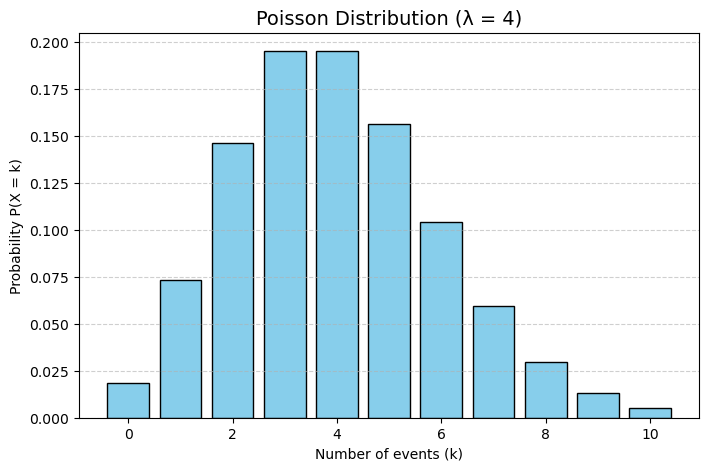

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial

# Parameters
lmbda = 4  # mean rate (λ)
k_values = np.arange(0, 11)  # number of events (0 to 10)

# Compute Poisson probabilities
probs = [(lmbda**k * exp(-lmbda)) / factorial(k) for k in k_values]

# Print probabilities
for k, p in zip(k_values, probs):
    print(f"P(X={k}) = {p:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.bar(k_values, probs, color='skyblue', edgecolor='black')
plt.title("Poisson Distribution (λ = 4)", fontsize=14)
plt.xlabel("Number of events (k)")
plt.ylabel("Probability P(X = k)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


🧠 What to observe:

- The bar heights show $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$
- The peak occurs near $k=\lambda=4$.
- The curve is right-skewed when λ is small, and becomes more bell-shaped as λ increases.

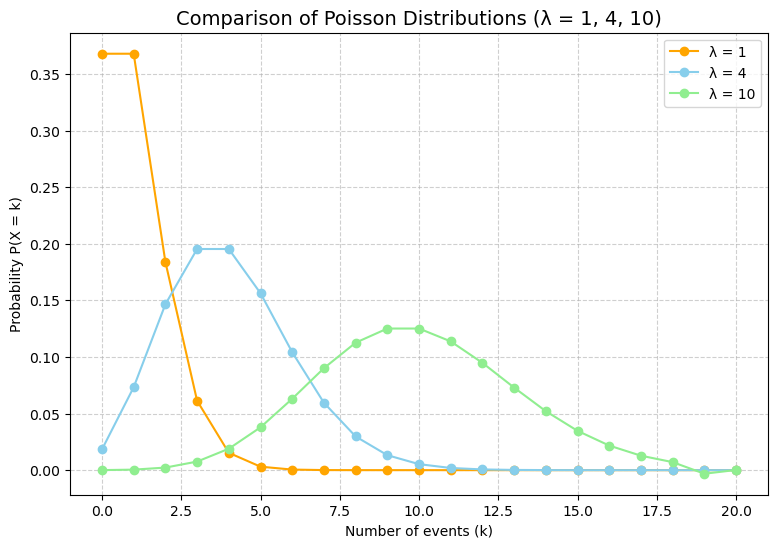

In [20]:
# λ values to compare
lambdas = [1, 4, 10]
colors = ['orange', 'skyblue', 'lightgreen']

# Range of k values (enough to cover all cases)
k_values = np.arange(0, 21)

plt.figure(figsize=(9, 6))

for lmbda, color in zip(lambdas, colors):
    # Compute Poisson probabilities
    probs = [(lmbda**k * exp(-lmbda)) / factorial(k) for k in k_values]
    plt.plot(k_values, probs, marker='o', color=color, label=f"λ = {lmbda}")

# Formatting
plt.title("Comparison of Poisson Distributions (λ = 1, 4, 10)", fontsize=14)
plt.xlabel("Number of events (k)")
plt.ylabel("Probability P(X = k)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Let’s unpack why the Poisson distribution starts to look Normal when λ becomes large.

🔹 1. Remember what each represents
- Poisson: counts of rare events in fixed intervals
- Normal: continuous, symmetric “bell curve” that describes averages or large sums

At first glance, they seem totally different — one is for discrete counts, one is for continuous values. But they connect through the Central Limit Theorem.

🔹 2. Intuitive explanation

When λ is small (say, 1 or 2):
- Events are rare,
- So 0, 1, 2 events dominate the probability,
- The distribution is right-skewed (tail to the right).

But as λ grows:
- We’re summing more independent little event counts,
- Random fluctuations start to average out,
- So the shape becomes smoother and symmetric → like the Normal bell curve.

That’s Central Limit Theorem at work again.

🔹 3. Mathematical connection

If $X \sim Poisson(\lambda)$, then for large λ:

$$X \approx N (\mu = \lambda, \sigma^2 = \lambda)$$

That means we can approximate:

$P(X=k) \approx $ area under $N(λ,λ)$ between k−0.5 and k+0.5

(the 0.5 is a continuity correction since Poisson is discrete).

🔹 4. Practical implication

When λ ≥ ~10:
- Poisson probabilities and Normal probabilities are almost identical.
- So we can replace complicated factorials with a simpler z-score approach.

If X∼Poisson(λ=25), what Normal distribution could we use to approximate it?
(Think: what would be the mean and SD?)

Let’s recall the rule:

If
$$X \sim Poisson(\lambda)$$

then for large $\lambda$:

$$X \approx N(\mu = \lambda,\sigma^2 = \lambda)$$

So for $\lambda = 25$:

$$\mu = 25, \sigma = \sqrt{25} = 5$$

✅ Therefore, the approximate Normal distribution is

$$X \approx N(25, 5^2)$$

(mean 25, standard deviation 5).

That means you can use z-scores and the Normal table to estimate Poisson probabilities

for example, $P(X≤30)$ could be approximated by $P(Z≤(30.5−25)/5)$.

Would you like to try that approximation together — calculating $P(X≤30)$ using the Normal model?

We’re still talking about a Poisson(λ = 25) distribution here, right?

If yes, then:
$$Mean μ=λ=25$$

$$Standard deviation \sigma = \sqrt{\sigma} = \sqrt{25} = 5$$

So:
✅ Mean = 25, SD = 5

If you meant a different Poisson (say λ = 30), then yes:
$$μ=30,σ=\sqrt{30}≈5.48$$

Now, since the Normal approximation uses

$$X∼N(λ,λ)$$

you can quickly get both the mean and SD for any λ by just taking its square root for σ.

Would you like to apply that to find P(X≤35) for λ = 30, using the Normal approximation?

Given:

$$X∼Poisson(λ=30)$$

Approximate with

$$X≈N(μ=30,σ=\sqrt{30}≈5.48)$$

We want $P(X≤35)$.

Step 1. Continuity correction

Because the Poisson is discrete, we use 35.5 instead of 35:

$$P(X≤35)≈P(Z≤\frac{35.5−30}{5.48})$$

Step 2. Compute z-score

$$z=\frac{5.5}{5.48}≈1.00$$

Step 3. Use z-table

From the standard normal table:

$$P(Z≤1.00)≈0.8413$$

✅ Final answer: 
$$P(X≤35)≈0.8413$$

#### Using Poisson Computation

In [21]:
# Define the parameters
lambda_val = 30
k = 35

# Calculate P(X <= 35) using the cumulative distribution function (CDF)
probability = poisson.cdf(k, mu=lambda_val)

# Print the result
print(f"The probability P(X <= 35) for a Poisson distribution with lambda = {lambda_val} is: {probability:.4f}")
# Output: The probability P(X <= 35) for a Poisson distribution with lambda = 30 is: 0.8426165255696685

The probability P(X <= 35) for a Poisson distribution with lambda = 30 is: 0.8426


#### Using Z-Score

In [22]:
# 1. Define the parameters
lambda_val = 30
X = 35

# 2. Define Normal Distribution parameters for approximation
mu = lambda_val        # Mean (mu) = lambda
sigma = np.sqrt(lambda_val) # Standard Deviation (sigma) = sqrt(lambda)

# 3. Apply Continuity Correction for P(X <= 35)
# P(X <= 35) is approximated by P(X_Normal <= 35 + 0.5)
X_corrected = X + 0.5

# 4. Calculate the Z-score
Z_score = (X_corrected - mu) / sigma

# 5. Calculate the approximate probability P(Z <= Z_score)
probability_approx = norm.cdf(Z_score)

# Print the results
print(f"Poisson Parameter (lambda): {lambda_val}")
print(f"Target X: {X}")
print("-" * 30)
print(f"Normal Approximation Parameters:")
print(f"Mean (mu): {mu}")
print(f"Standard Deviation (sigma): {sigma:.4f}")
print(f"Corrected X value: {X_corrected}")
print(f"Calculated Z-score: {Z_score:.4f}")
print("-" * 30)
print(f"Approximate Probability P(X <= 35) using Z-score: {probability_approx:.6f}")

Poisson Parameter (lambda): 30
Target X: 35
------------------------------
Normal Approximation Parameters:
Mean (mu): 30
Standard Deviation (sigma): 5.4772
Corrected X value: 35.5
Calculated Z-score: 1.0042
------------------------------
Approximate Probability P(X <= 35) using Z-score: 0.842349


So, there’s about an 84% chance of getting 35 or fewer events when the average is 30.

let’s find the 90th percentile for $X∼Poisson(λ=30)$. I’ll show a quick Normal-approximation (with continuity correction) and then the exact result so you can compare.

1) Normal approximation (with continuity correction)

Poisson(30) ≈ Normal with mean μ=30 and SD $\sigma = \sqrt{30} \approx 5.4772$

We want the smallest integer $k$ such that $P(X≤k)≥0.90$.

Using the 90%-quantile of the standard normal $z_{0.90} \approx 1.28155$ and continuity correction:

$$k + 0.5 \approx \mu + z_{0.90} \sigma$$

$$k + 0.5 \approx 30 +1.28155 \times 5.47723 \approx 37.02$$

$$k≈37.02−0.5≈36.52$$

So the approximation suggests $k$ is about 36–37 (we take an integer).

2) Exact Poisson CDF check

Computing the Poisson cumulative probabilities shows:
- $P(X≤36)≈0.88037$
- $P(X≤37)≈0.91099$

So the smallest integer $k$ with $P(X≤k)≥0.90$ is $k=37$.


Final answer

The 90th percentile for Poisson(30) is $k=37$.
> Interpretation: there’s about a 90% chance of observing 37 or fewer events in the interval, and about a 10% chance of observing more than 37.

If poisson.cdf(37, mu=30) ≈ 0.91, what does that number represent in plain words?

> There is a 91% chance that the number of events will be 37 or fewer.

So the CDF (cumulative distribution function) always gives you the probability up to and including that value — not the probability of exactly 37, but of ≤ 37.

### Application of Poisson 

🔹 1. Poisson models events over time or space

It’s built for questions like:
> “If on average 5 events happen per hour, what’s the chance of getting 2 events in half an hour?”

🔹 2. Key property — the rate scales with time
If the average rate is λ=5 per hour, then for any time period t (in hours):

$$\lambda_t = \lambda \times t$$

So in half an hour,

$$\lambda_{0.5} = 5 \times 0.5 = 2.5$$

That’s your new mean for that time frame.

🔹 3. Example

Let’s find the probability of exactly 2 events in half an hour.

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} = \frac{2.5^2 e^{-2.5}}{2!} = \frac{6.25 \times 0.0821}{2} \approx 0.256$$

✅ So there’s about a 25.6% chance of seeing exactly 2 events in half an hour.


In [23]:
# Define the parameters
lambda_val = 2.5
k = 2

# Calculate P(X = k) using probability mass function (PMF)
probability = poisson.pmf(k, mu=lambda_val)

# Print the result
print(f"The probability P(X = {k}) for a Poisson distribution with lambda = {lambda_val} is: {probability:.4f}")

The probability P(X = 2) for a Poisson distribution with lambda = 2.5 is: 0.2565


🔹 4. This scaling works both ways

If you want the rate per 2 hours instead:

$$\lambda =5×2=10$$

and the probability of 10 events, then plug that λ into the same formula.

In [24]:
# Define the parameters
lambda_val = 10
k = 10

# Calculate P(X = k) using probability mass function (PMF)
probability = poisson.pmf(k, mu=lambda_val)

# Print the result
print(f"The probability P(X = {k}) for a Poisson distribution with lambda = {lambda_val} is: {probability:.4f}")

The probability P(X = 10) for a Poisson distribution with lambda = 10 is: 0.1251


“average 3 emails per hour; what’s the chance of getting no emails in 30 minutes

We’re told:

Average rate λ=3 emails per hour

We’re looking at a 30-minute period, i.e. t=0.5 hours

Step 1. Scale the rate

$$\lambda_t=λ×t=3×0.5=1.5$$

So we expect 1.5 emails on average in half an hour.

Step 2. Compute the probability of 0 emails

P(X=0)= 0.2231
e
−1.5
≈0.2231

✅ Final Answer: $P(X=0)≈0.223$

So, there’s about a 22.3% chance of receiving no emails in a 30-minute window,
when you average 3 emails per hour.

In [26]:
# Define the parameters
lambda_val = 3/2
k = 0

# Calculate P(X = k) using probability mass function (PMF)
probability = poisson.pmf(k, mu=lambda_val)

# Print the result
print(f"The probability P(X = {k}) for a Poisson distribution with lambda = {lambda_val} is: {probability:.4f}")

The probability P(X = 0) for a Poisson distribution with lambda = 1.5 is: 0.2231


“What’s the probability of 12 or more events in 2 hours when λ = 10”?

k = 12
lambda = 10

In [27]:
# Define the parameters
lambda_val = 10
k = 11

# Calculate P(X = k) using probability mass function (PMF)
probability = poisson.sf(k, mu=lambda_val)

# Print the result
print(f"The probability P(X = {k}) for a Poisson distribution with lambda = {lambda_val} is: {probability:.4f}")

The probability P(X = 11) for a Poisson distribution with lambda = 10 is: 0.3032


🔹 1. BINOMIAL DISTRIBUTION

Scenario:
- Fixed number of independent trials, each with two outcomes (success/failure).

Key parameters:
- $n$: number of trials
- $p$: probability of success per trial

Formula:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Examples:
- Number of heads in 10 coin flips
- Number of defective items in 50 tests

Mean & SD:

$$μ=np,σ=\sqrt{np(1−p)}$$
	​


Shape:
- Symmetric if p=0.5
- Skewed if p far from 0.5
- Becomes approximately Normal when n is large and p not too small

🔹 2. POISSON DISTRIBUTION

Scenario:
- Counts of rare, independent events in a fixed time or space interval.

Parameter:
- λ: average rate of events per interval (also mean and variance)

Formula:

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Examples:
- Number of emails per hour
- Machine breakdowns per week
- Website hits per minute

When used:
n is large and p is small, so np=λ is moderate → Poisson approximates the Binomial.

Mean & SD:

$$μ=λ,σ=\sqrt{λ}$$
	​


🔹 3. NORMAL DISTRIBUTION

Scenario:
- Continuous data that cluster around a mean (sum/average of many small effects).

Parameters:
- μ: mean
- σ: standard deviation

Formula (pdf):

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Examples:
- Heights, weights, test scores, measurement errors

Special notes:
- Approximates both Binomial and Poisson for large samples
- Foundation for z-scores, confidence intervals, and many ML methods

Summary Table

| Feature           | Binomial         | Poisson                  | Normal          |
| ----------------- | ---------------- | ------------------------ | --------------- |
| Type              | Discrete         | Discrete                 | Continuous      |
| Describes         | Success counts   | Event counts             | Continuous data |
| Parameters        | n, p             | λ                        | μ, σ            |
| Mean              | np               | λ                        | μ               |
| Variance          | np(1-p)          | λ                        | σ²              |
| Approx. by Normal | for large n      | for large λ              | itself Normal   |
| Typical shape     | Symmetric/skewed | Right-skewed → symmetric | Bell curve      |


Now that you see how they fit together:
- Binomial → counts of successes
- Poisson → counts over time/space (rare events)
- Normal → continuous bell shape that emerges from both

## Exponential distribution

🔹 1. Motivation — “time between events”

You already know Poisson gives the number of events per interval (like 4 emails per hour).
But what if we ask the opposite question?

> “How long do I wait until the next email arrives?”

That’s where the Exponential distribution comes in.
It models the time between Poisson events.

🔹 2. Relationship to Poisson

If events occur at a Poisson rate λ per unit time,
then the waiting time T between two consecutive events follows an Exponential(λ) distribution.

So:
- Poisson → counts of events
- Exponential → time between events

🔹 3. Formula and intuition

The probability density function (pdf):
$$f(t) = \lambda e^{-\lambda t}, t\geq 0$$

and the cumulative (cdf):
$$P(T \leq t) = 1 - e^{-\lambda t}$$

🔹 4. Mean and Standard Deviation

Both are simply:

$$\mu = \sigma = \frac{1}{\lambda}$$

So, if on average you get 5 events per hour (λ = 5), then the expected waiting time between events is 1/5=0.2 hours (12 minutes).

🔹 5. Example

Emails arrive at an average rate of 3 per hour (λ = 3).
What’s the probability that the next email arrives within 10 minutes (1/6 hour)?

$$P(T \leq \frac{1}{6}) = 1 - e^{-3 \frac{1}{6}} = 1 - e^{-0.5} \approx 0.393$$

✅ So there’s about a 39% chance the next email arrives within 10 minutes

In [28]:
# Define the parameters
lambda_val = 3
t = 1/6

# Calculate P using cdf  (CDF)
probability = expon.cdf(t, scale=1/lambda_val)

# Print the result
print(f"The probability P(X = {t}) for a exponential distribution with lambda = {lambda_val} is: {probability:.4f}")

The probability P(X = 0.16666666666666666) for a exponential distribution with lambda = 3 is: 0.3935


📘 Example:

A call center receives calls at an average rate of 2 per minute
(λ=2).
- What’s the probability that you’ll wait more than 1 minute for the next call?

In [29]:
# Define the parameters
lambda_val = 2
t = 1

# Calculate P using cdf  (CDF)
probability = expon.sf(t, scale=1/lambda_val)

# Print the result
print(f"The probability P(X > {t}) for a exponential distribution with lambda = {lambda_val} is: {probability:.4f}")

The probability P(X > 1) for a exponential distribution with lambda = 2 is: 0.1353


Let’s check step by step to confirm:

$$P(T \gt t) = e^{-\lambda t}$$

Given $λ=2$ (calls per minute) and $t=1$ minute:

$$P(T \gt 1) = e^{-2 \times 1}=  e^{-2} \approx 0.1353$$

✅ That’s 13.53% exactly!

Based on that, what’s the probability that you’ll wait less than 1 minute for the next call?

$$P(T \lt t) = 1 - P( T \gt t)$$
$$1 - 0.1353 = 0.8647$$

✅ So there’s an 86.47% chance you’ll wait less than 1 minute for the next call.

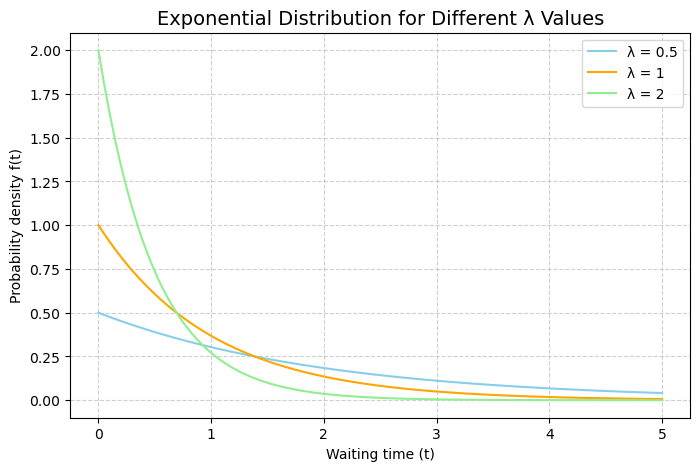

In [30]:
# Different lambda (rate) values
lambdas = [0.5, 1, 2]
colors = ['skyblue', 'orange', 'lightgreen']

# Time values
t = np.linspace(0, 5, 200)

plt.figure(figsize=(8, 5))

for lmbda, color in zip(lambdas, colors):
    f_t = lmbda * np.exp(-lmbda * t)   # Exponential PDF
    plt.plot(t, f_t, color=color, label=f"λ = {lmbda}")

plt.title("Exponential Distribution for Different λ Values", fontsize=14)
plt.xlabel("Waiting time (t)")
plt.ylabel("Probability density f(t)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



🧠 How to interpret the plot:
- λ = 0.5: events are slow → long, gentle decay → long average waiting time
- λ = 1: medium rate → moderate decay
- λ = 2: events are frequent → steep drop → short waiting times

So, as 
λ increases:
- The curve becomes steeper
- The expected wait time 1/λ shrinks

Find the median waiting time (the point where there’s a 50% chance the event has occurred)?

🔹 1. Recall the CDF

$$P(T \leq t) = 1 - e^{-\lambda t}$$

The median $t_{0.5}$ is where $P(T≤t_{0.5})=0.5$.

🔹 2. Set up the equation
$$1 - e^{-\lambda t_{0.5}} = 0.5$$

Simplify:

$$e^{-\lambda t_{0.5}} = 0.5$$

🔹 3. Solve for $t_{0.5}$
	​


Take the natural log:
$$-\lambda t_{0.5} = ln(0.5)$$
	​

$$t_{0.5} = \frac{ln(2)}{\lambda}$$
	​


✅ Formula:

$$\text{Median waiting time} = \frac{ln(2)}{\lambda}$$
	​

🔹 4. Example

If λ=2 (like the call center earlier):

$$t_{0.5} = \frac{ln(2)}{2} \approx 0.3466$$

That’s 0.35 minutes, or about 21 seconds.
So half the time, you’ll wait less than 21 seconds for the next call.

If λ=1, what would the median waiting time be?

$$t_{0.5} = \frac{ln(2)}{1} \approx 0.3466$$

In [39]:
lambda_val = 1
median_waiting_time = np.log(2) /  lambda_val

print(f"The median waiting time for λ={lambda_val} is approximately: {median_waiting_time:.4f}")

median_waiting_time_seconds = median_waiting_time * 60
print(f"The median waiting time in seconds: {median_waiting_time_seconds:.2f} seconds")

The median waiting time for λ=1 is approximately: 0.6931
The median waiting time in seconds: 41.59 seconds


Perfect ✅ — that’s completely correct and beautifully reasoned.

Let’s restate clearly what you did:

$$t_{0.5} = \frac{ln(2)}{\lambda}$$
	​


For λ=1:

$$t_{0.5} = \frac{ln(2)}{1} \approx 0.6931 (minutes)$$

Converted to seconds:

$$0.6931×60≈41.6 seconds.$$

✅ So half the time, the next event arrives within about 41.6 seconds.

Nicely done — you’ve got the Exponential distribution intuition locked in.

### The connection between Poisson and Exponential.

🔹 1. Concept link

Think of a Poisson process as a timeline of random events.

For example, let’s say emails arrive at an average rate of λ=2 per minute.

That means:
- In one minute, the number of emails follows a Poisson(2) distribution.
- The time between those emails follows an Exponential(2) distribution.
So both describe the same process — just from two angles:

| View            | Question                           | Distribution                   |
| --------------- | ---------------------------------- | ------------------------------ |
| **Poisson**     | How many events occur in time *t*? | $(X \sim \text{Poisson}(λt))$    |
| **Exponential** | How long until the next event?     | $(T \sim \text{Exponential}(λ))$ |

🔹 2. Visual intuition

If you simulate a few random Exponential waiting times and keep adding them up,
you’ll get a timeline of event arrivals.

Then if you count how many events occurred by time t, you get a Poisson count!

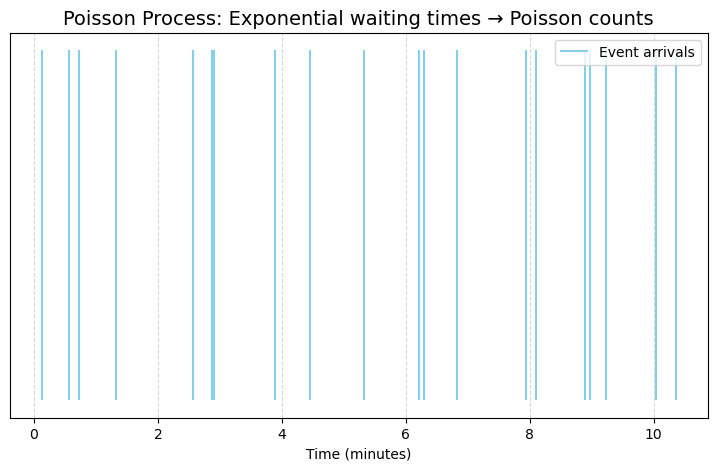

In [37]:
# Poisson process rate
lambda_val = 2  # events per minute

# Simulate 20 exponential waiting times
waiting_times = np.random.exponential(scale=1/lambda_val, size=20)

# Cumulative sum gives event arrival times
arrival_times = np.cumsum(waiting_times)

# Plot
plt.figure(figsize=(9, 5))
plt.vlines(arrival_times, 0, 1, color='skyblue', label="Event arrivals")
plt.title("Poisson Process: Exponential waiting times → Poisson counts", fontsize=14)
plt.xlabel("Time (minutes)")
plt.yticks([])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


🧠 Interpretation
- The vertical lines show when each event happens.
- The gaps between them follow an Exponential(λ).
- The number of events in any given interval (say 0–1, 0–2, etc.) follows a Poisson(λt).

They’re two sides of the same random process.

Let’s build intuition first, then compare Uniform, Normal, and Exponential distributions side by side.

🔹 1. What “continuous” means

In a continuous distribution, the variable can take any real value within a range.
For example:

Height: 170.25 cm, 170.26 cm — infinitely many possibilities.

Waiting time, temperature, age, etc.

Unlike discrete ones (like Poisson or Binomial), we talk about probability density, not exact probabilities:

$$P(a \leq X \leq b) = \text{area under the curve from a to b}$$


🔹 2. The three key continuous distributions

| Distribution       | Shape                        | Key idea                          | Typical formula & parameters                          |
| ------------------ | ---------------------------- | --------------------------------- | ----------------------------------------------------- |
| **Uniform(a,b)**   | Flat                         | All values equally likely         | $(f(x)=1/(b-a)) for (a≤x≤b)$                            |
| **Normal(μ,σ)**    | Bell curve                   | Centered around mean; symmetric   | $(f(x)=\frac{1}{σ\sqrt{2π}} e^{-\frac{(x-μ)^2}{2σ^2}})$ |
| **Exponential(λ)** | Rapid decay from high to low | Models time between random events | $(f(x)=λ e^{-λx}) for (x≥0) $                           |


🔹 3. Intuitive examples

| Scenario                                     | Likely model    |
| -------------------------------------------- | --------------- |
| Rolling a random real number between 0 and 1 | **Uniform**     |
| Human heights or exam scores                 | **Normal**      |
| Waiting time between bus arrivals            | **Exponential** |


🔹 4. Mean and Variance summary
| Distribution   | Mean (μ)  | Variance (σ²) |
| -------------- | --------- | ------------- |
| Uniform(a,b)   | (a + b)/2 | (b − a)² / 12 |
| Normal(μ,σ)    | μ         | σ²            |
| Exponential(λ) | 1/λ       | 1/λ²          |


🔹 5. Shapes summary
- Uniform: flat (equal chance everywhere)
- Normal: symmetric, bell-shaped
- Exponential: one-sided, right-skewed

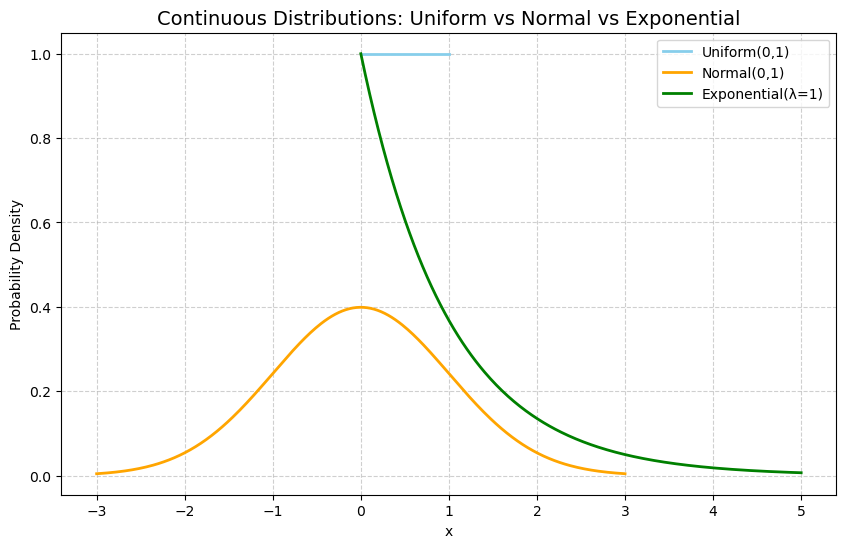

In [38]:
# Create x-values for each distribution
x_uniform = np.linspace(0, 1, 200)
x_normal = np.linspace(-3, 3, 300)
x_expo = np.linspace(0, 5, 300)

# PDF formulas
uniform_pdf = np.ones_like(x_uniform)  # Uniform(0,1)
normal_pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_normal**2)  # Normal(0,1)
expo_pdf = np.exp(-x_expo)  # Exponential(λ=1)

# Plot all three
plt.figure(figsize=(10, 6))
plt.plot(x_uniform, uniform_pdf, label="Uniform(0,1)", color="skyblue", linewidth=2)
plt.plot(x_normal, normal_pdf, label="Normal(0,1)", color="orange", linewidth=2)
plt.plot(x_expo, expo_pdf, label="Exponential(λ=1)", color="green", linewidth=2)

# Beautify
plt.title("Continuous Distributions: Uniform vs Normal vs Exponential", fontsize=14)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


🧠 How to interpret the chart:
- Uniform: flat line → every value between 0 and 1 is equally likely.
- Normal: symmetric bell curve → most values near the mean (0), fewer as you go out.
- Exponential: starts high, decays quickly → many short waiting times, few long ones.

🔹 1. Key difference from discrete case

In discrete distributions (like Binomial or Poisson):

$$P(X=k)$$

gives the probability of an exact value.

But for continuous distributions (like Normal, Exponential, Uniform):

$$P(X=x)=0$$

because there are infinitely many possible values.

Instead, we talk about probability density — the area under the curve between two points.

🔹 2. The general rule

$$P(a \leq X \leq b) = \int_{a}^{b} f(x) \, dx$$

That integral (area) gives the probability of X being between a and b.

🔹 3. Examples
🟦 Uniform(0,1)

The height of the PDF is $1/(1−0)=1$.

So the area from 0.2 to 0.5 is:

$$P(0.2 \leq X \leq 0.5) = \int_{0.2}^{0.5} 1 dx = 0.3$$

✅ 30% of the area (simple rectangle).

🟧 Normal(0,1)

We can’t integrate it by hand easily, but the area tells us things like:

- $P(−1≤X≤1)≈0.68$
- $P(−2≤X≤2)≈0.95$
- $P(−3≤X≤3)≈0.997$

That’s the 68–95–99.7 rule you already know!

🟩 Exponential(λ=1)

Let’s find the probability $P(X≤2)$:

$$P(X \leq 2) = \int_{0}^{2} e^{-x}\, dx = 1 - e^{-2} \approx 0.8647$$

So about 86% of the total area lies between 0 and 2.

🔹 4. Visualization idea

If you shade the area under the curve between two x-values, that shaded region is the probability.

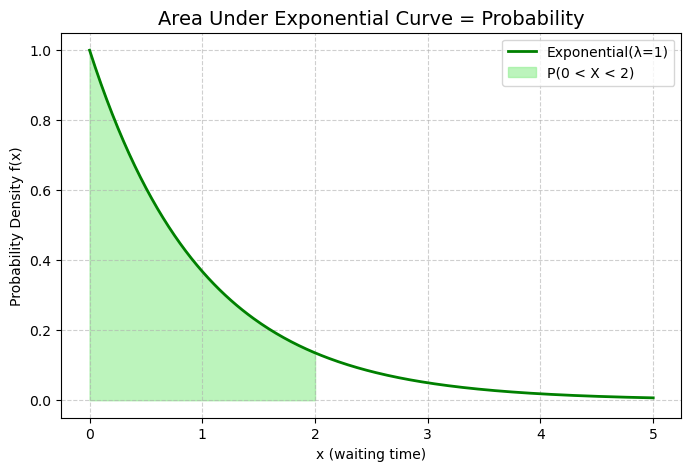

In [41]:
# Exponential parameters
lmbda = 1
x = np.linspace(0, 5, 300)
pdf = lmbda * np.exp(-lmbda * x)

# Define the region to shade (0 < X < 2)
x_fill = np.linspace(0, 2, 200)
pdf_fill = lmbda * np.exp(-lmbda * x_fill)

# Plot the exponential curve
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="Exponential(λ=1)", color="green", linewidth=2)

# Shade area under the curve
plt.fill_between(x_fill, pdf_fill, color="lightgreen", alpha=0.6, label="P(0 < X < 2)")

# Beautify
plt.title("Area Under Exponential Curve = Probability", fontsize=14)
plt.xlabel("x (waiting time)")
plt.ylabel("Probability Density f(x)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


🧠 What you’ll see:
- The green curve is the Exponential(λ=1) PDF.
- The shaded area (0 to 2) represents $P(0<X<2)$.
- If you integrate that area, you get $1−e^{−2}≈0.8647$, meaning an 86% chance the event happens within 2 time units.

Charts of normal distribution

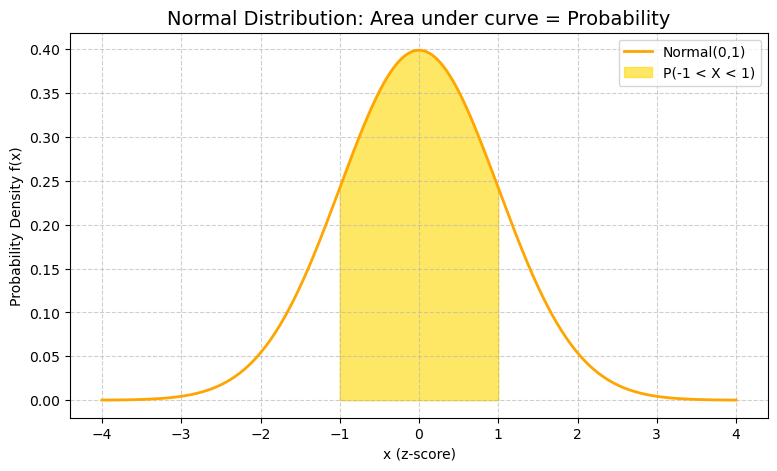

In [42]:
# Standard normal range
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, loc=0, scale=1)

# Shaded region between -1 and 1
x_fill = np.linspace(-1, 1, 200)
pdf_fill = norm.pdf(x_fill, loc=0, scale=1)

# Plot
plt.figure(figsize=(9, 5))
plt.plot(x, pdf, color="orange", linewidth=2, label="Normal(0,1)")
plt.fill_between(x_fill, pdf_fill, color="gold", alpha=0.6, label="P(-1 < X < 1)")

plt.title("Normal Distribution: Area under curve = Probability", fontsize=14)
plt.xlabel("x (z-score)")
plt.ylabel("Probability Density f(x)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


🧠 What this shows:
- The bell curve is the standard Normal (mean = 0, SD = 1).
- The shaded area between −1 and +1 covers ≈ 68% of total probability.
- That’s the first part of the 68–95–99.7 rule.

Excellent 👏 — this version shades three regions under the standard Normal curve:

±1 SD (68%)

±2 SD (95%)

±3 SD (99.7%)

So you can see how probability accumulates as you move away from the mean.

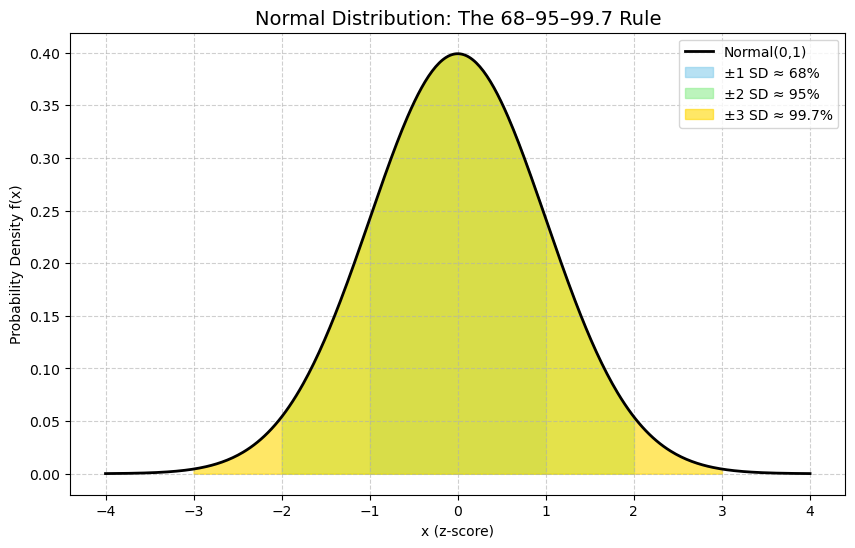

In [43]:
# Standard normal x range
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color="black", linewidth=2, label="Normal(0,1)")

# Fill areas for ±1, ±2, ±3
regions = [(1, "skyblue", "±1 SD ≈ 68%"),
           (2, "lightgreen", "±2 SD ≈ 95%"),
           (3, "gold", "±3 SD ≈ 99.7%")]

for sd, color, label in regions:
    x_fill = np.linspace(-sd, sd, 200)
    pdf_fill = norm.pdf(x_fill, loc=0, scale=1)
    plt.fill_between(x_fill, pdf_fill, color=color, alpha=0.6, label=label)

# Beautify
plt.title("Normal Distribution: The 68–95–99.7 Rule", fontsize=14)
plt.xlabel("x (z-score)")
plt.ylabel("Probability Density f(x)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


🧠 What you’ll see:

- Gold area (±3) covers almost the entire curve (≈99.7%)
- Green (±2) shows 95%
- Blue (±1) highlights the core 68%

The curve is symmetric, centered at mean = 0

In [44]:
# ±1, ±2, ±3 standard deviations
intervals = [1, 2, 3]

for sd in intervals:
    area = norm.cdf(sd) - norm.cdf(-sd)
    print(f"P(-{sd} < X < {sd}) = {area:.4f}")


P(-1 < X < 1) = 0.6827
P(-2 < X < 2) = 0.9545
P(-3 < X < 3) = 0.9973


Those are exactly the 68%, 95%, and 99.7% rules you’ve been using — now verified by code.

🧠 What happens
- `norm.cdf(sd)` gives the area to the left of that z-score.
- Subtracting the left tail gives the middle region.

🧭 Concept Map — Continuous Distributions

| Distribution       | Typical Shape              | What It Models                                                 | Key Formula / Property                                 | Area Under Curve = Probability                          |
| ------------------ | -------------------------- | -------------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------- |
| **Uniform(a,b)**   | 🟦 Flat line               | Every value equally likely                                     | $f(x)=1/(b-a) for (a≤x≤b)$                           | Area of rectangle → $P(a≤X≤b)=\frac{b-a}{\text{range}}$ |
| **Normal(μ,σ)**    | 🟠 Bell-shaped (symmetric) | Natural variation around a mean (e.g. height, IQ, test scores) | $f(x)=\frac{1}{σ\sqrt{2π}}e^{-\frac{(x-μ)^2}{2σ^2}}$| Area between limits gives % of data (68–95–99.7 rule)   |
| **Exponential(λ)** | 🟩 Right-skewed decay      | Waiting time between Poisson events                            | $f(x)=λ e^{-λx}, (x≥0)$                              | Area from 0→t gives $P(T≤t)=1-e^{-λt}$                |


🧠 Intuition Recap
- Uniform → "Flat fairness" → every outcome equally likely
- Normal → "Bell of balance" → clustering around a mean
- Exponential → "Decay of chance" → early events more likely, long waits rare

🧮 Area meaning

For continuous distributions:
- The height of the curve at any point = density (not probability).
- The area under the curve = probability.
- Total area under each curve = 1.0 (100%).

🌈 Analogy summary

| Analogy                | Uniform                | Normal                  | Exponential                      |
| ---------------------- | ---------------------- | ----------------------- | -------------------------------- |
| **Fair game**          | Rolling a fair spinner | Bell-shaped test scores | Waiting for first goal in soccer |
| **Shape**              | 📏 Rectangle           | 🛎 Bell                 | 📉 Steep slope                   |
| **Formula simplicity** | Constant               | Complex                 | Simple exponential               |


🧭 1. Uniform Distribution — for Random Sampling

Where it appears:
- Random initialization (e.g., weights in neural networks)
- Splitting data into train/test sets (np.random.rand())
- Simulating random noise or feature values

Why use it:
- Every value is equally likely → unbiased randomness
- Example: `np.random.uniform(0, 1, size=1000)` gives 1000 random values evenly spread between 0 and 1.

🧠 2. Normal Distribution — for Modeling Real-World Data

Where it appears:
- Many features (like height, test scores, noise) are roughly Normal.
- Used in:
    - Feature scaling (standardization → z-scores)
    - Regression residuals assumption
    - Weight initialization (Xavier/He) in deep learning
    - Synthetic data generation

Why:
- By Central Limit Theorem, many small effects combine → Normal shape.

```python
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
```

After scaling, each feature ≈ Normal(0,1).

⚡ 3. Exponential Distribution — for Time and Decay Models

Where it appears:
- Modeling time until event (like survival analysis, churn, system failures)
- Learning rate decay or exponential moving average
- Queueing models, response times, and dropout rates

Example:
```python
# Exponential moving average (EMA)
ema_t = alpha * x_t + (1 - alpha) * ema_(t-1)
```

This formula is exponential weighting in disguise — recent events matter more.

🔹 Summary Table

| Distribution | ML Use Case                  | Why                           |
| ------------ | ---------------------------- | ----------------------------- |
| Uniform      | Random sampling, weight init | Equal chance, no bias         |
| Normal       | Feature scaling, residuals   | Models real variation         |
| Exponential  | Time decay, survival, EMA    | Models time or rate of change |


Now we’ll learn how to detect which distribution fits your data, step by step — a very practical skill in statistics and ML.

🔹 1. Start with a visual check (Histogram)

This is your first clue.

```python
import matplotlib.pyplot as plt

plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()
```

What to look for:

| Shape                    | Possible Distribution      |
| ------------------------ | -------------------------- |
| Flat                     | Uniform                    |
| Bell-shaped & symmetric  | Normal                     |
| Rapid drop, right-skewed | Exponential or Lognormal   |
| Long right tail          | Skewed (maybe Exponential) |


🔹 2. Overlay candidate PDFs

To test your guess, overlay a theoretical curve on your histogram:

```python
import numpy as np
from scipy.stats import norm, expon, uniform

x = np.linspace(min(data), max(data), 100)

plt.hist(data, bins=30, density=True, alpha=0.6, color='lightgray')
plt.plot(x, norm.pdf(x, np.mean(data), np.std(data)), 'r-', label='Normal')
plt.plot(x, expon.pdf(x, scale=np.mean(data)), 'g--', label='Exponential')
plt.plot(x, uniform.pdf(x, min(data), max(data)-min(data)), 'b:', label='Uniform')
plt.legend()
plt.show()
```

You’ll see which curve matches your data best.

🔹 3. Use Q–Q Plots (Quantile–Quantile)

They show whether your data follow a theoretical distribution (like Normal).

```python
import scipy.stats as stats
stats.probplot(data, dist="norm", plot=plt)
plt.show()
```

Interpretation:
- Points on a straight line → good fit
- Curved pattern → not Normal

🔹 4. Formal statistical tests

Use these when you want objective evidence:

| Test                         | Checks for                  | Use when             |
| ---------------------------- | --------------------------- | -------------------- |
| **Shapiro–Wilk**             | Normality                   | small/medium samples |
| **Kolmogorov–Smirnov (K–S)** | any dist vs reference       | flexible             |
| **Anderson–Darling**         | Normality (sensitive tails) | larger samples       |


```python
from scipy.stats import shapiro, kstest, norm

stat, p = shapiro(data)
print(f"Shapiro-Wilk p-value: {p}")
```

If `p > 0.05` → fail to reject normality → data likely Normal.



🔹 5. In practice

In ML:
- You rarely need perfect fits — just to know the shape (symmetric, skewed, heavy-tailed).

That informs:
- Whether to normalize or log-transform
- Which loss function or model to use